# Import Libraries 

In [1]:
import pandas as pd
import numpy as np
import os
import matplotlib.pyplot as plt
import seaborn as sns
import scipy

# Load Subset files

In [2]:
path = r'C:\Users\Home\Desktop\Career Foundry- Data Analyst.2\Instacart Basket Analysis'

In [3]:
df_ords_prods_computed = pd.read_pickle(os.path.join(path, 'Data', 'Prepared data', 'ords_prods_merge_aggregated_2.pkl'))

In [4]:
df_ords_prods_computed.head()

,order_id,user_id,eval_set,order_number,orders_day_of_week,order_hour_of_day,days_since_prior_order,product_id,add_to_cart_order,reordered,...,first_name,Surname,Gender,State,Age,date_joined,n_dependants,family_status,income,my_indicator_column
0,3204302,158116,prior,9,0,11,7.0,19938,4,0,...,James,Glenn,Male,Iowa,25,2017-07-21,1,married,71430,both
1,1415564,158116,prior,8,0,9,27.0,8277,17,0,...,James,Glenn,Male,Iowa,25,2017-07-21,1,married,71430,both
2,2019627,158116,prior,6,5,17,5.0,34969,17,0,...,James,Glenn,Male,Iowa,25,2017-07-21,1,married,71430,both
3,1378290,158116,prior,13,6,12,27.0,18583,26,0,...,James,Glenn,Male,Iowa,25,2017-07-21,1,married,71430,both
4,1923556,158116,prior,5,0,21,13.0,47734,10,0,...,James,Glenn,Male,Iowa,25,2017-07-21,1,married,71430,both


# Create a bar chart, a histogram, a scatterplot, and a line chart, using a sample subset

<Axes: xlabel='orders_day_of_week'>

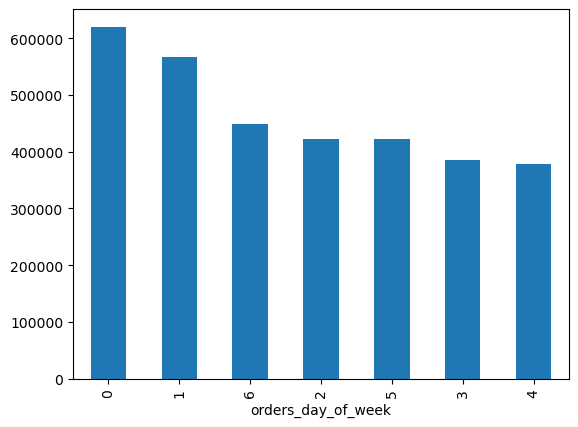

In [5]:
df_ords_prods_computed['orders_day_of_week'].value_counts().plot.bar()

In [6]:
df_ords_prods_computed['orders_day_of_week'].value_counts()

orders_day_of_week
0    620191
1    566048
6    449372
2    422643
5    421730
3    385093
4    378344
Name: count, dtype: int64

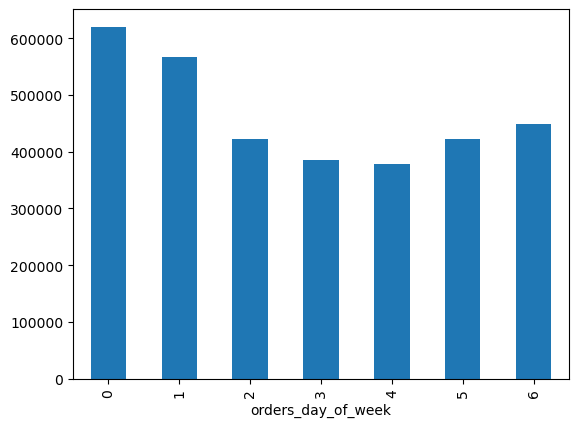

In [7]:
Bar_chart = df_ords_prods_computed['orders_day_of_week'].value_counts().sort_index().plot.bar()

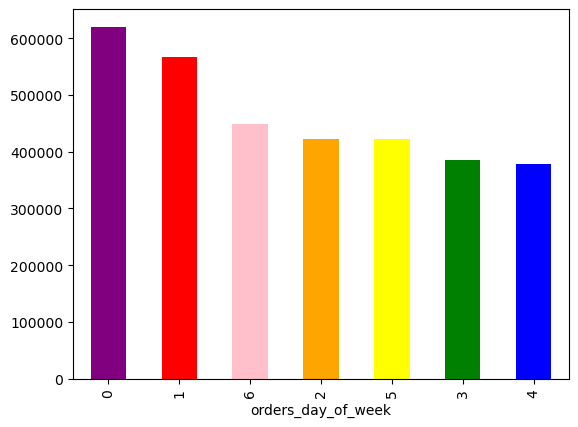

In [8]:
#Add color to the bars in chart
Bar_chart = df_ords_prods_computed['orders_day_of_week'].value_counts().plot.bar(color=['purple', 'red', 'pink', 'orange', 'yellow', 'green', 'blue'])

In [9]:
Bar_chart.figure.savefig(os.path.join(path, 'Analysis', 'Visualizations', 'bar_colour_chart.png'))

# Creat list of random number 

In [10]:
#Create the seed
np.random.seed(4)

In [11]:
#Creating a list of True/False values testing if each randomly generated number from np.random.rand() is less than or equal to 0.7.
dev = np.random.rand(len(df_ords_prods_computed)) <= 0.7

Create dataframes in two subset small: 30% big: 70%

In [12]:
big = df_ords_prods_computed[dev]

In [13]:
small = df_ords_prods_computed[~dev]

In [14]:
df_ords_prods_computed.shape

(3243421, 37)

In [15]:
len(big) + len(small)

3243421

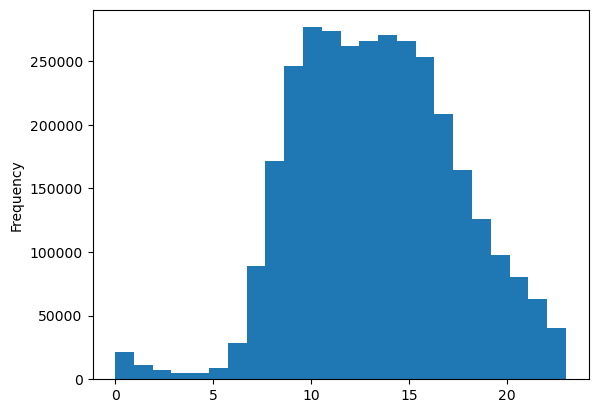

In [16]:
order_hour_of_day = df_ords_prods_computed['order_hour_of_day'].plot.hist(bins=24)

In [17]:
#Export the histogram chart
order_hour_of_day.figure.savefig(os.path.join(path, 'Analysis', 'Visualizations', 'order_hour_of_day.png'))

The bar chart shows that there are fewer orders during the quietest times, which are from 1 am to 6 am. The busiest hours for orders are around 9 am to 6 pm. After 5 pm, the number of orders starts to go down, and as each hour passes, it keeps decreasing steadily.

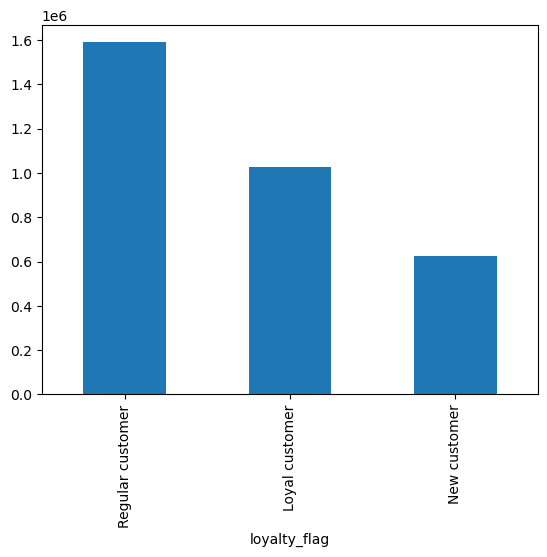

In [19]:
#Create a bar chart from the loyalty_flag column
bar_loyalty_flag = df_ords_prods_computed['loyalty_flag'].value_counts().plot.bar()

In [20]:
df_2=small[['order_hour_of_day', 'prices']]

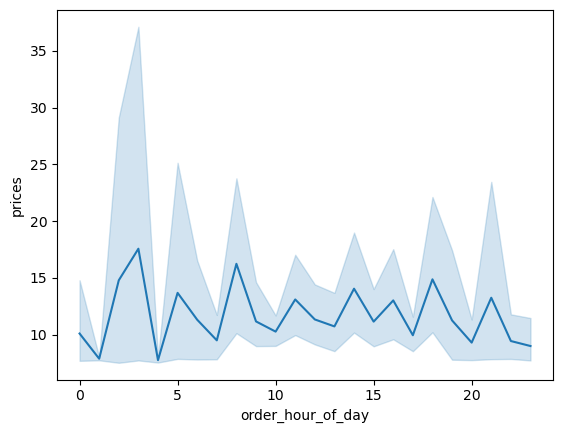

In [22]:
Chart_hour_of_day_ordered=sns.lineplot(data=df_2, x='order_hour_of_day', y='prices')

In [23]:
Chart_hour_of_day_ordered.figure.savefig(os.path.join(path, 'Analysis', 'Visualizations', 'Chart_hour_of_day_ordered.png'))

In [25]:
df_3=small[['n_dependants', 'Age']]

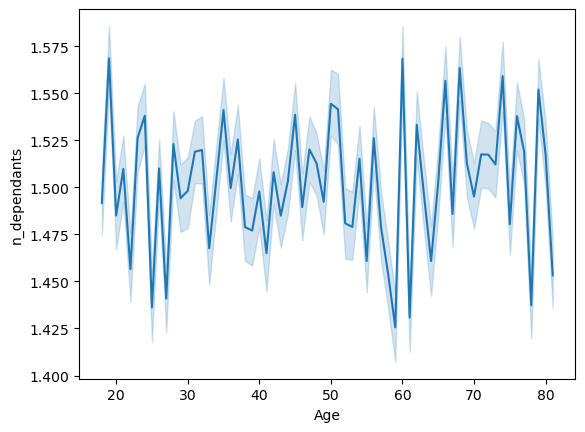

In [28]:
Chart_number_of_dependants=sns.lineplot(data=df_3, x='Age', y='n_dependants')

The line chart does not indicate a clear relationship between age and the number of dependents.

In [30]:
Chart_number_of_dependants.figure.savefig(os.path.join(path, 'Analysis', 'Visualizations', 'n_dependants.png'))

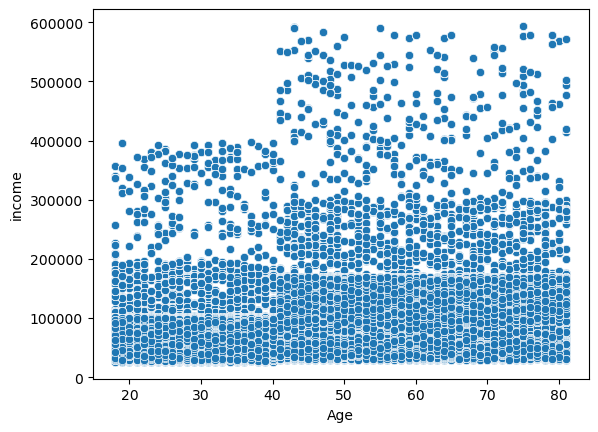

In [36]:
#Creating scatterplot to see the relation between age and income
scatterplot_age_income = sns.scatterplot(x = 'Age', y = 'income', data = df_ords_prods_computed)

The scatterplot tells us that most people, no matter their age, have incomes around 200,000. The next group with good incomes is the 40 and older age group, making around 300,000. People from all age groups also have incomes around 400,000. Additionally, there are some people aged 40 and above with incomes around 600,000.

In [37]:
scatterplot_age_income.figure.savefig(os.path.join(path, 'Analysis', 'Visualizations', 'scatterplot_age_income.png'))